In [12]:
import os
import glob
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.seterr(divide="ignore", invalid="ignore")

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [13]:
root_path = "C:/Users/fping/Desktop/sundarbans_data"

In [14]:
os.chdir(path=root_path)

In [15]:
list_bands = ['']

In [16]:
for bp in glob.glob("*_(Raw)*"):
    with rio.open(bp, "r") as b:
        list_bands.append(b.read(1))
list_bands.remove('')
bands = np.stack(list_bands)

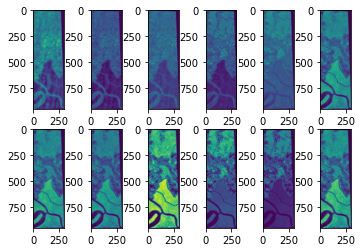

In [17]:
fig, axs = plt.subplots(2,6)
axs = axs.flatten()
for i in range(bands.shape[0]): 
    axs[i].imshow(bands[i,:,:])

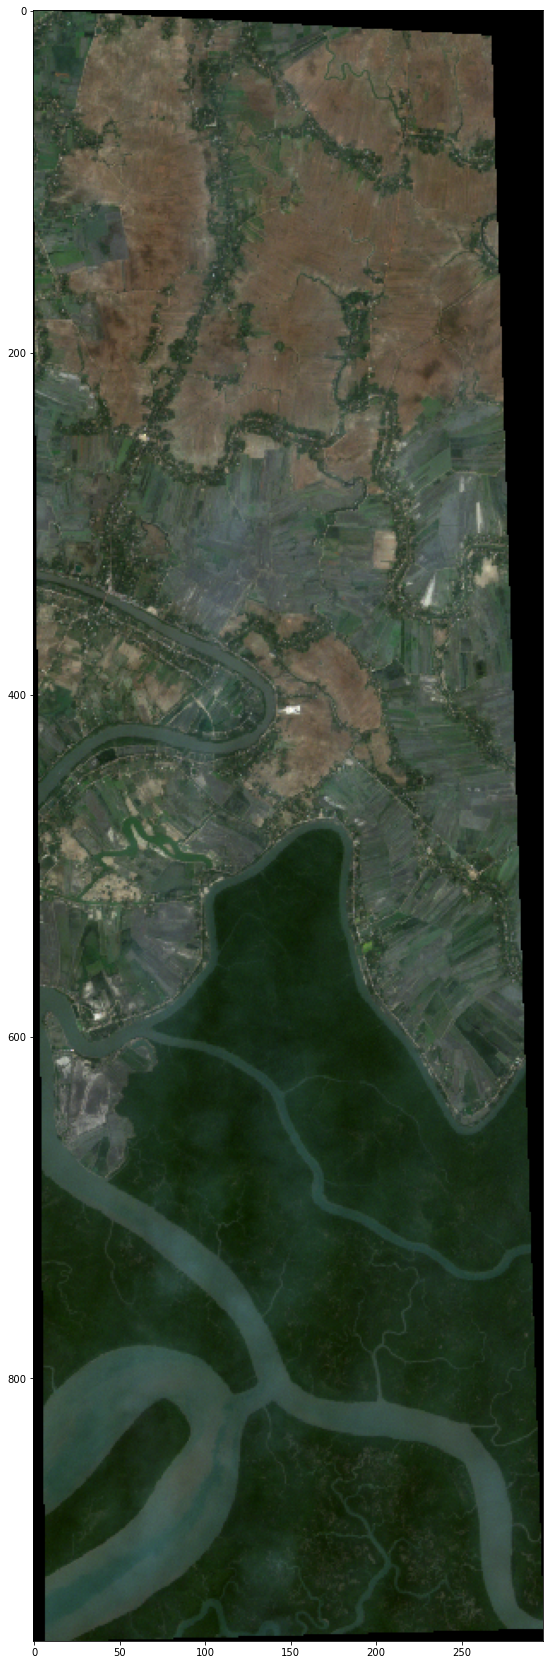

In [18]:
r = bands[3,:,:]
r = (r - np.min(r)) / (np.max(r) - np.min(r))
g = bands[2,:,:]
g = (g - np.min(g)) / (np.max(g) - np.min(g))
b = bands[1,:,:]
b = (b - np.min(b)) / (np.max(b) - np.min(b))

fig = plt.figure(figsize=(30,30))
plt.imshow(np.dstack((r,g,b)))

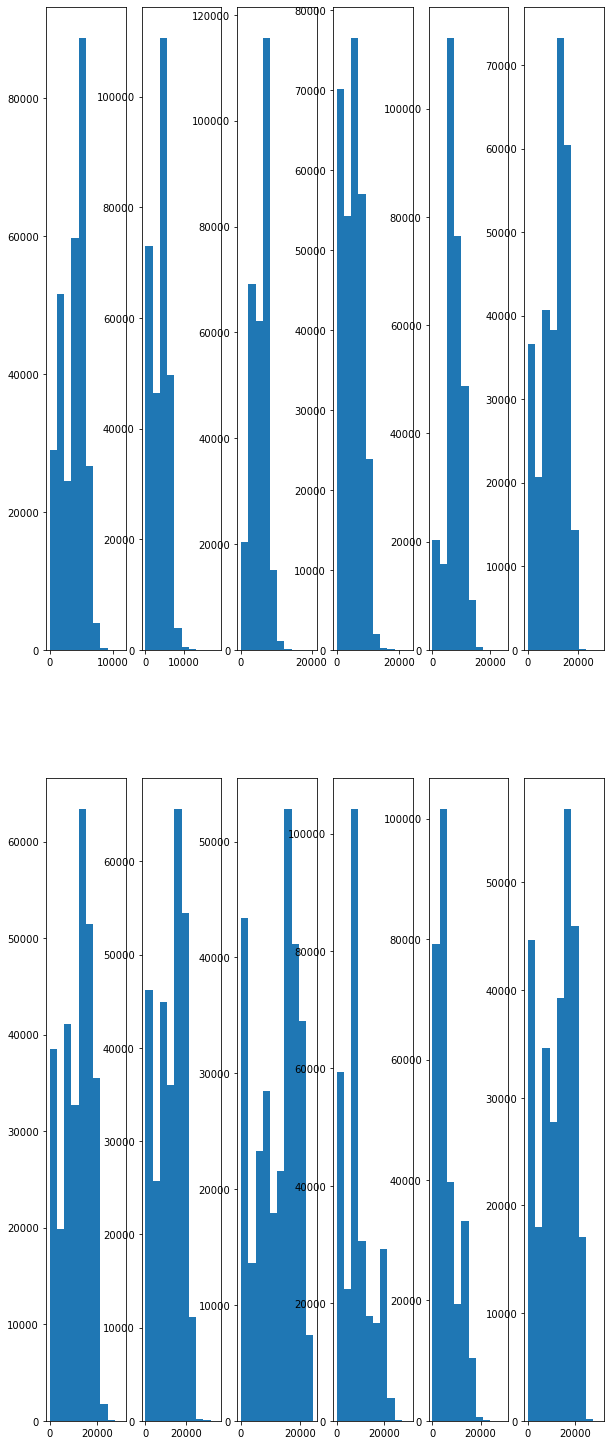

In [19]:
fig, ax = plt.subplots(2,6, figsize=(10,26))
ax = ax.flatten()
for i in range(bands.shape[0]):
    ax[i].hist(bands[i].flatten())

In [21]:
ndvi = (bands[7,:,:] - bands[3,:,:])/(bands[7,:,:] + bands[3,:,:])

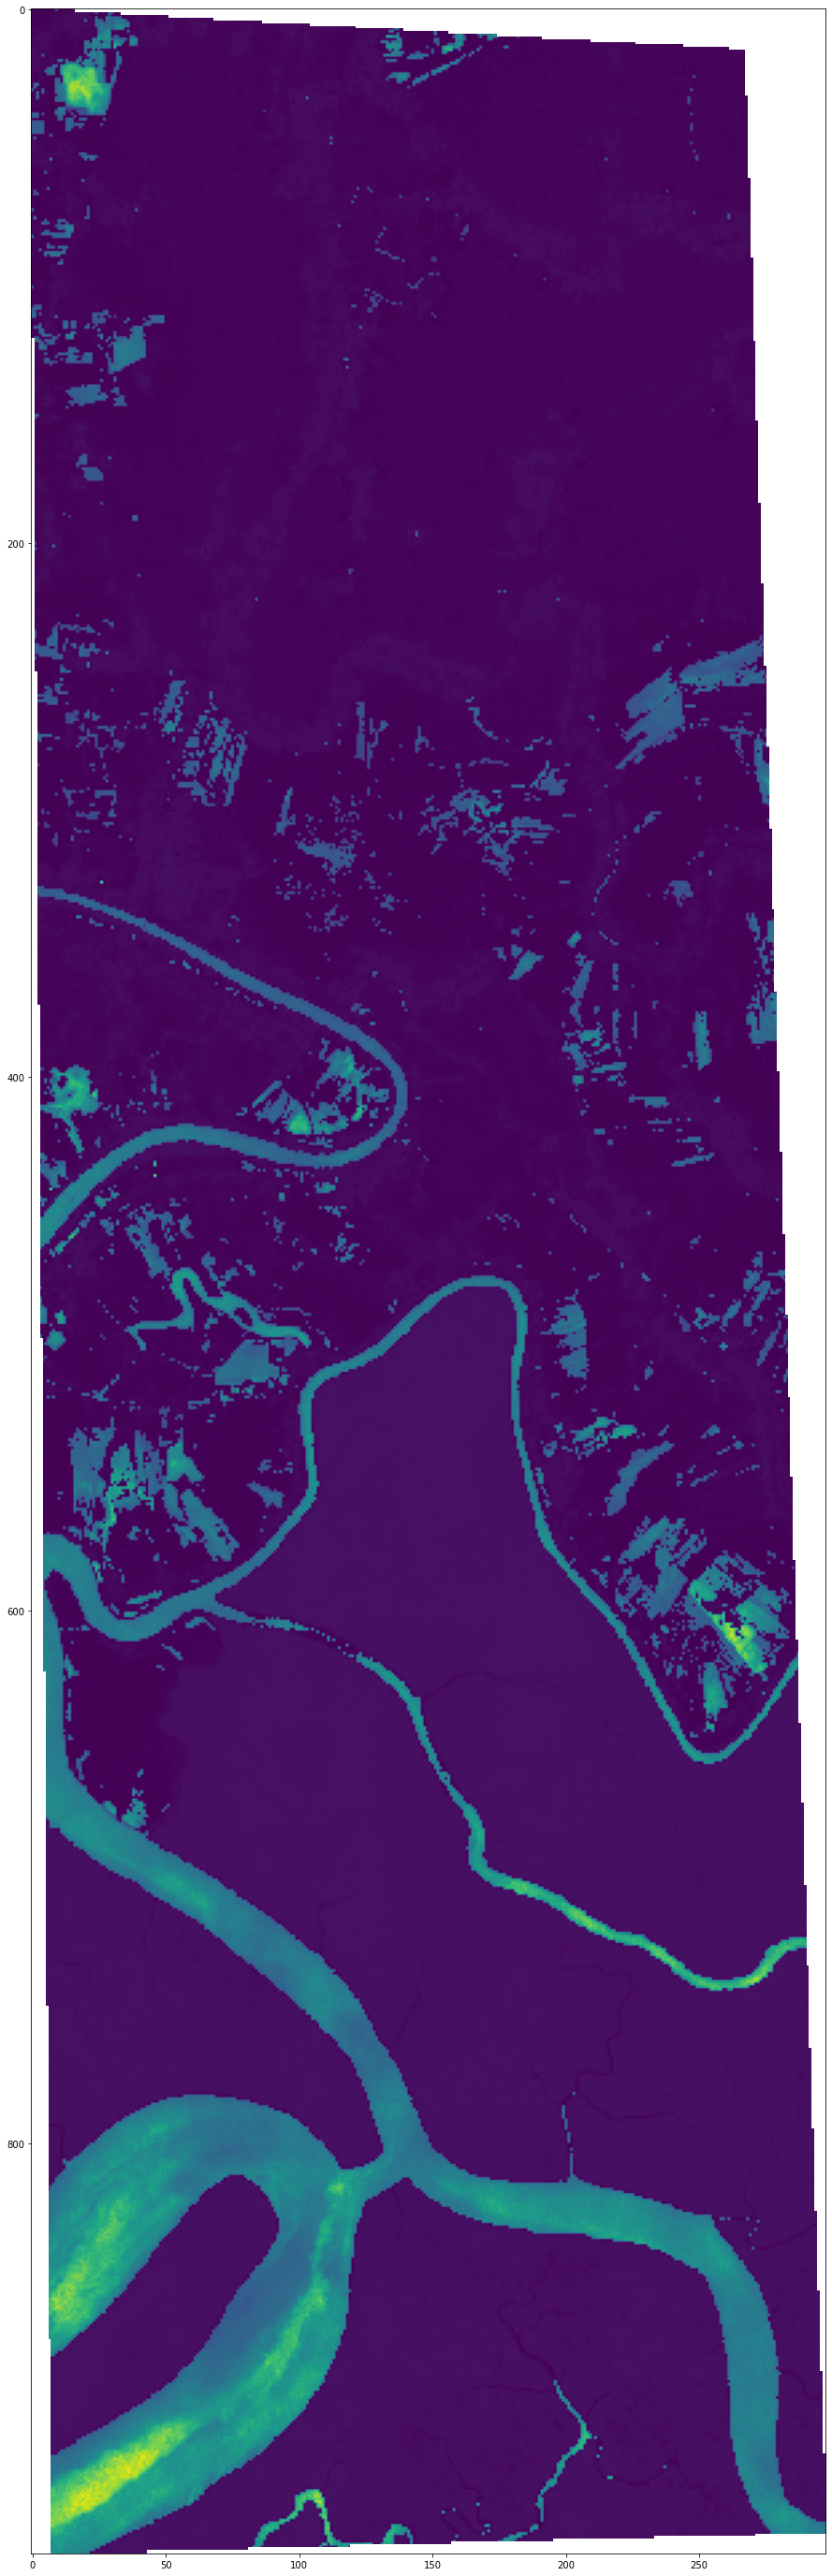

In [28]:
fig = plt.figure(figsize=(50,50))
plt.imshow(ndvi)